# RFM (Recency Frequency Monitory) Analysis

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns" , None)

In [84]:
df = pd.read_csv(r'D:\Learnbay\Weekend Project Sunduram sir\E-COMMERS\E-com_Data.csv')
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [85]:
df.shape

(541116, 12)

In [86]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

## Data Cleaning & EDA
- Identify missing values & noise in data
- Cleaning and visualizing the data
- Conducting analysis by invoice , product & othere variable

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,404189.0,2181.909035,1252.681881,2.0,1207.0,2078.0,3291.0,4372.0
InvoieNo,537979.0,385017.572063,13426.052649,361429.0,372961.0,385706.0,396873.0,406651.0
Quantity,537979.0,9.343339,27.623322,-2003.0,1.0,3.0,10.0,3186.0
price per Unit,537979.0,378.339062,440.048823,1.0,169.0,261.0,456.0,64973.0
Price,537979.0,2161.414593,4538.487177,-10152.0,451.0,1194.0,2232.0,90400.0
Sold as set,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Identity Missing value

In [89]:
df.isnull().sum()

CustomerID           136927
Item Code              3137
InvoieNo               3137
Date of purchase       3137
Quantity               3137
Time                   3137
price per Unit         3137
Price                  3137
Shipping Location      3137
Cancelled_status     532771
Reason of return     541113
Sold as set          541116
dtype: int64

## Choise only Requried column
- CustomerID => for customer segmentation
- InvoieNo => for frequency
- Date of purchase => for Recency
- Price => for monatory

In [90]:
drop_column = [
    "Item Code",
    "Quantity",
    "Time",
    "price per Unit",
    "Shipping Location",
    "Cancelled_status",
    "Reason of return",
    "Sold as set",
]

In [91]:
df.drop(columns=drop_column , inplace=True)

In [92]:
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


## Handling Duplicated values

In [93]:
df.duplicated().sum()

6008

In [94]:
df.drop_duplicates(inplace=True)

In [95]:
df.duplicated().sum()

0

## Handling missing values

In [96]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

    missing_value = pd.concat([missing_number , missing_percent] , axis=1 , keys=['missing_number' , 'missing_percent'])

    return missing_value[missing_value['missing_number'] > 0]

In [97]:
missing_values(df)

,missing_number,missing_percent
CustomerID,132249,0.247145
InvoieNo,1,0.000002
Date of purchase,1,0.000002
Price,1,0.000002


#### Observation 
- without CustomerID we cant use RFM approch 
- so drop the misssing values on the base of CustomerID 
- we can't use imputation methods to fill the data

In [98]:
df.dropna(subset=['CustomerID'] , inplace=True)

In [99]:
df.isnull().sum()

CustomerID          0
InvoieNo            0
Date of purchase    0
Price               0
dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402859 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        402859 non-null  float64
 1   InvoieNo          402859 non-null  float64
 2   Date of purchase  402859 non-null  object 
 3   Price             402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


## Data Wrangling 
- change format & column name

In [101]:
import datetime
df['Date of purchase'] = pd.to_datetime(df['Date of purchase'])

In [102]:
df.rename(columns={'InvoieNo':'InvoiceNo','Date of purchase':'Date'} , inplace=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402859 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  402859 non-null  float64       
 1   InvoiceNo   402859 non-null  float64       
 2   Date        402859 non-null  datetime64[ns]
 3   Price       402859 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.4 MB


## EDA

In [104]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
CustomerID,402859.0,2182.187224,2.0,1207.0,2078.0,3291.0,4372.0,1252.636483
InvoiceNo,402859.0,385642.971491,361429.0,374193.0,386934.0,397130.0,406651.0,13106.663884
Date,402859,2017-07-15 14:25:02.538605056,2016-12-02 00:00:00,2017-04-12 00:00:00,2017-08-05 00:00:00,2017-10-26 00:00:00,2017-12-19 00:00:00,NaN
Price,402859.0,2477.465103,-10152.0,556.0,1572.0,2496.0,90400.0,4896.268647


In [105]:
df['CustomerID'].nunique()

4349

- There are  4349 customer unique customer and they did multiple transaction thourght the 2 years (2016 -2017)
- thats why we have 402859 records 

In [106]:
df['Date'].describe().T

count                           402859
mean     2017-07-15 14:25:02.538605056
min                2016-12-02 00:00:00
25%                2017-04-12 00:00:00
50%                2017-08-05 00:00:00
75%                2017-10-26 00:00:00
max                2017-12-19 00:00:00
Name: Date, dtype: object

- first transaction date is 2016-12-02
- last transaction date is  2017-12-19
- it helps us to find out the frequency

## Recency 
- in our dataset last transaction happen on 2017-12-19 
- so for calculation Recency we consider one day ahead i.e. 2017-12-20

In [107]:
new_date = datetime.datetime(2017,12,20)
new_date

datetime.datetime(2017, 12, 20, 0, 0)

##### **RFM Analysis** : is a marketing techniques and method used to evaluate customer behavior
##### RFM stands for **Recency**, **Frequency**, and **Monetary**

- **Recency:** Indicates how recently a customer has made a purchase. Customer who have purchased more recently have a higher recency score.
- **Frequency:** Represents how many times a customer has made a purchase within a specific time period(typically within a year). Customer who
purchase more frequently have a higher frequency score

- **Monetary:** Refers to the total amount a customer has spent within a specific time period. Customer who spend more have a higher monetary score.

- A Score of **3** represent the best customers (most recent, most frequent, and highest spending)
- A score of **12** represent the lease engaged customers.

- **Prime (vip) Customers**
- **Loyal customers**
- **Potential customer**

In [108]:
rfmApproch = df.groupby("CustomerID").agg(
    {
        "Date": lambda x: (new_date - x.max()).days,
        "InvoiceNo": lambda x: x.count(),
        "Price": lambda x: x.sum(),
    }
)

In [109]:
rfmApproch.rename(columns = {'Date':'Recency', 'InvoiceNo':'Frequency','Price':'Monetary'}, inplace=True)
rfmApproch.reset_index()
rfmApproch.head()


,Recency,Frequency,Monetary
CustomerID,,,
2.0,4,181,550416.0
3.0,77,27,257404.0
4.0,19,72,176613.0
5.0,311,16,41976.0
6.0,37,84,151822.0


In [110]:
rfmApproch.shape

(4349, 3)

In [111]:
rfmApproch.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4349.0,93.299379,100.701315,1.0,18.0,51.0,144.0,381.0
Frequency,4349.0,92.632559,230.742279,1.0,17.0,42.0,101.0,7919.0
Monetary,4349.0,229493.932881,855668.518674,-50372.0,38140.0,83635.0,205444.0,35472089.0


## Split the data into 4 quantiles basis quantile method 

In [112]:
quantile = rfmApproch.quantile(q=[0.25,0.50,0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

## Create categories based on the quantiles
- x => customer
- d => days
- p => percentile (quantile)

In [113]:
def Recency_value(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

### Frequency & Monetary has same nature 
- above 0.75 is good
- 0.75 - 0.50 is avg
- 0.50 - 0.25 is below avg
- less than 0.25 is not satisfactory

In [114]:
def Frequency_Monatory_value(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [115]:
rfmApproch['R'] = rfmApproch['Recency'].apply(Recency_value ,args=('Recency' , quantile))
rfmApproch['F'] = rfmApproch['Frequency'].apply(Frequency_Monatory_value ,args=('Frequency' , quantile))
rfmApproch['M'] = rfmApproch['Monetary'].apply(Frequency_Monatory_value ,args=('Monetary' , quantile))

In [116]:
rfmApproch.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2


- the range is from 3 to 12

## add the three column 

In [117]:
rfmApproch['RFM'] = rfmApproch[['R', 'F', 'M']].sum(axis=1)
rfmApproch.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,2.0,4,181,550416.0,1,1,1,3
1,3.0,77,27,257404.0,3,3,1,7
2,4.0,19,72,176613.0,2,2,2,6
3,5.0,311,16,41976.0,4,4,3,11
4,6.0,37,84,151822.0,2,2,2,6


### Convert to csv for Client(Business)

In [118]:
rfmApproch.to_csv('rfmApproch.csv')

## Find the total clusters

In [119]:
rfmApproch['RFM'].value_counts()

RFM
10    508
3     471
7     461
9     458
8     447
5     439
12    410
6     405
11    380
4     370
Name: count, dtype: int64

## Loyality labels
- convert 10 clusters into 4 and give them loyality labels

In [120]:
loyality_level = ['Platinum' , 'Gold' , 'Silver' , 'Bronze']
score_cut = pd.qcut(rfmApproch['RFM'] , q=4 , labels=loyality_level)
rfmApproch['Loyality_level'] = score_cut.values
rfmApproch.reset_index(inplace=True)

In [121]:
rfmApproch.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Loyality_level
0,2.0,4,181,550416.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,3,3,1,7,Gold
2,4.0,19,72,176613.0,2,2,2,6,Gold
3,5.0,311,16,41976.0,4,4,3,11,Bronze
4,6.0,37,84,151822.0,2,2,2,6,Gold


In [122]:
rfmApproch['Loyality_level'].value_counts()

Loyality_level
Gold        1313
Platinum    1280
Silver       966
Bronze       790
Name: count, dtype: int64

In [123]:
rfmApproch.to_csv('Loyality_level.csv')

## Final Report

In [124]:
final_report = (
    rfmApproch.groupby("Loyality_level")[["Recency", "Frequency", "Monetary" , "CustomerID"]]
    .agg(
        {
            "Recency": "sum",
            "Frequency": "sum",
            "Monetary": "sum",
            "CustomerID": "nunique",
        }
    )
    .reset_index()
)

In [125]:
final_report

,Loyality_level,Recency,Frequency,Monetary,CustomerID
0,Platinum,25971,294629,763311232.0,1280
1,Gold,84142,75914,165998506.0,1313
2,Silver,121714,23728,50215730.1,966
3,Bronze,173932,8588,18543646.0,790


In [126]:
final_report = final_report.rename(columns={'CustomerID'  : 'No. of Buyers'})
final_report

,Loyality_level,Recency,Frequency,Monetary,No. of Buyers
0,Platinum,25971,294629,763311232.0,1280
1,Gold,84142,75914,165998506.0,1313
2,Silver,121714,23728,50215730.1,966
3,Bronze,173932,8588,18543646.0,790


## Add percentage on repoart

In [127]:
final_report['Percentage'] = round( final_report['No. of Buyers'] / final_report['No. of Buyers'].sum() *100 , 2)
final_report

,Loyality_level,Recency,Frequency,Monetary,No. of Buyers,Percentage
0,Platinum,25971,294629,763311232.0,1280,29.43
1,Gold,84142,75914,165998506.0,1313,30.19
2,Silver,121714,23728,50215730.1,966,22.21
3,Bronze,173932,8588,18543646.0,790,18.17


## Visualize the report

In [128]:
final_report_1 = final_report[['Loyality_level','No. of Buyers','Percentage']]
final_report_1

,Loyality_level,No. of Buyers,Percentage
0,Platinum,1280,29.43
1,Gold,1313,30.19
2,Silver,966,22.21
3,Bronze,790,18.17


In [129]:
loyality_level

['Platinum', 'Gold', 'Silver', 'Bronze']

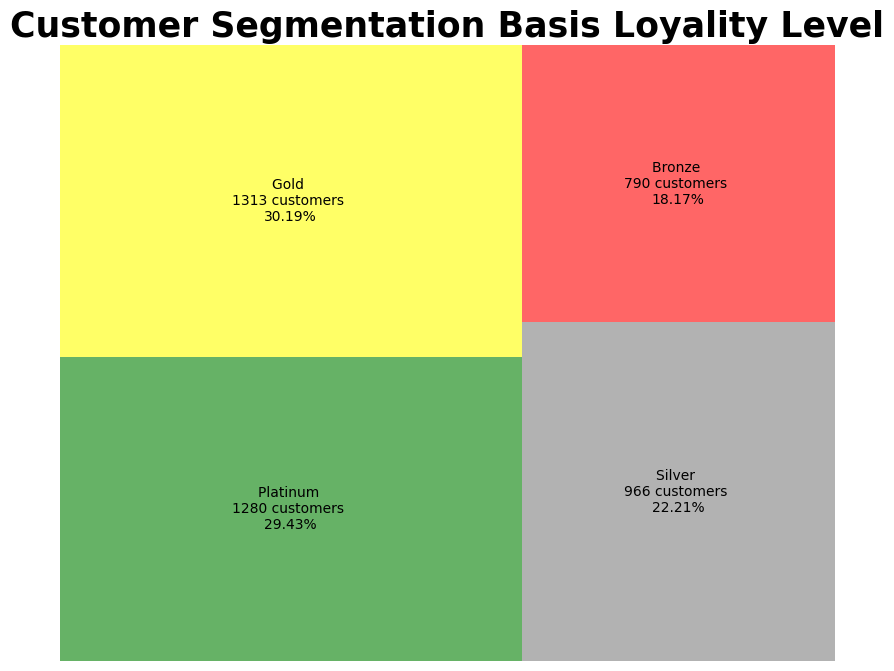

In [130]:
import squarify

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)
colors_dics = {"Platinum": "green", "Gold": "yellow", "Silver": "gray", "Bronze": "red"}

squarify.plot(
    sizes=final_report_1["No. of Buyers"],
    color=colors_dics.values(),
    label=[
        "{} \n{:0.0f} customers \n{}%".format(*final_report_1.iloc[i])
        for i in range(0, len(final_report_1))
    ],
    alpha=0.6,
)
plt.title("Customer Segmentation Basis Loyality Level", fontsize=25, fontweight="bold")
plt.axis("off")
plt.show()

In [131]:
final_report_1.columns

Index(['Loyality_level', 'No. of Buyers', 'Percentage'], dtype='object')

In [132]:
import plotly.graph_objects as go
colors_dics = {
    "Platinum": "green",
    "Gold": "yellow",
    "Silver": "gray",
    "Bronze": "red"
}

fig = go.Figure(
    data=[
        go.Pie(
            labels=final_report_1["Loyality_level"],
            values=final_report_1["No. of Buyers"],
            text=[
                f"{int(row['No. of Buyers'])} customers<br>{row['Percentage']}%"
                for _, row in final_report_1.iterrows()
            ],
            textinfo="label+text",
            hoverinfo="label+percent+value",
            marker=dict(colors=[colors_dics[level] for level in final_report_1["Loyality_level"]]),
            hole=0  # set to 0.4 if you want a donut chart
        )
    ]
)

fig.update_layout(
    title_text="Customer Segmentation Based on Loyalty Level",
    title_font=dict(size=25, family="Arial", color="black")
)

fig.show()


# Unsupervised Machine Learning 
- Segmentation / Clustering

## KMean Clusterming 

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [134]:
rfm_df = rfmApproch[['Recency', 'Frequency', 'Monetary']]
rfm_df.head()

,Recency,Frequency,Monetary
0,4,181,550416.0
1,77,27,257404.0
2,19,72,176613.0
3,311,16,41976.0
4,37,84,151822.0


### Feature Scalling 

In [135]:
scaler  = StandardScaler()
rfm_sclaer = scaler.fit_transform(rfm_df)

### Customer Segementation (KMean)
- finding obtimal cluster using Elbow Method 
- Calculating sum of squred error 
- inertia_ means Centroid value 

In [136]:
sse =[]
for k in range(1,11):
    kmean = KMeans(n_clusters=k , random_state=42)
    kmean.fit(rfm_sclaer)
    sse.append(kmean.inertia_)

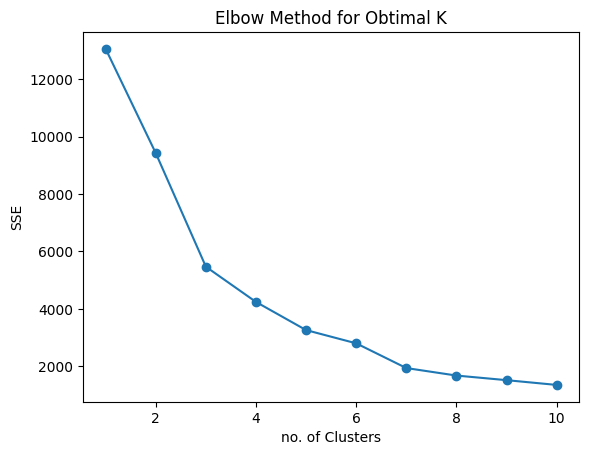

In [137]:
plt.plot(range(1,11) , sse , marker='o')
plt.xlabel('no. of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Obtimal K')
plt.show()

#### Observation 
- Obtimal K value is 5

In [138]:
kmeans = KMeans(n_clusters=5 , random_state=42)
rfm_df['KMeans_Cluster'] = kmeans.fit_predict(rfm_sclaer)

In [139]:
rfm_df.head()

,Recency,Frequency,Monetary,KMeans_Cluster
0,4,181,550416.0,0
1,77,27,257404.0,0
2,19,72,176613.0,0
3,311,16,41976.0,1
4,37,84,151822.0,0


In [140]:
rfm_df['KMeans_Cluster'].value_counts()

KMeans_Cluster
0    2920
1    1063
4     351
3      11
2       4
Name: count, dtype: int64

In [141]:
rfm_df['KMeans_Cluster'].value_counts(normalize=True)

KMeans_Cluster
0    0.671419
1    0.244424
4    0.080708
3    0.002529
2    0.000920
Name: proportion, dtype: float64

## Hierachical Cluster
- Dendogram (Agglomerative Approch)

In [142]:
from scipy.cluster.hierarchy import dendrogram ,linkage , fcluster 
import scipy.cluster.hierarchy as sch

In [143]:
linked = linkage(rfm_sclaer , method='ward')

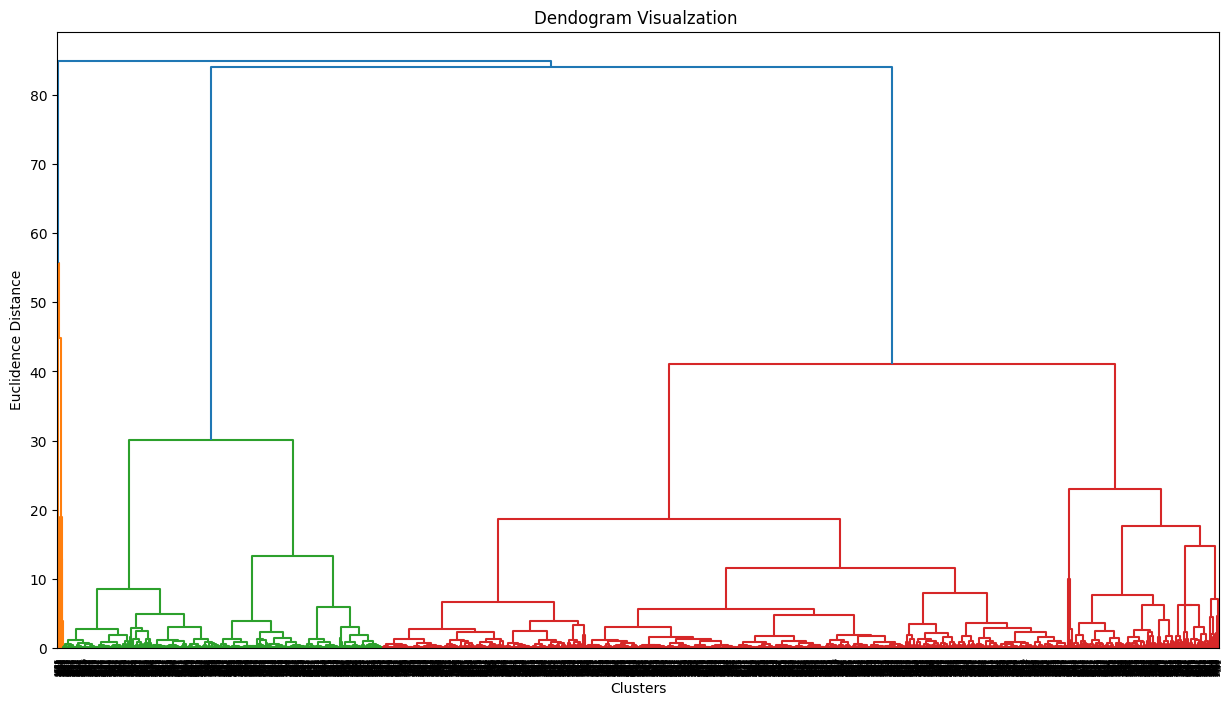

In [144]:
plt.figure(figsize=(15,8))
dendrogram(linked)
plt.title("Dendogram Visualzation ")
plt.xlabel('Clusters')
plt.ylabel('Euclidence Distance')
plt.show()

In [145]:
rfm_df['Hierachical_Cluster'] = fcluster(linked , 6 , criterion='maxclust')

In [146]:
rfm_df.head()

,Recency,Frequency,Monetary,KMeans_Cluster,Hierachical_Cluster
0,4,181,550416.0,0,6
1,77,27,257404.0,0,5
2,19,72,176613.0,0,5
3,311,16,41976.0,1,4
4,37,84,151822.0,0,5


In [147]:
rfm_df['Hierachical_Cluster'].value_counts()

Hierachical_Cluster
5    2564
4    1197
6     566
2      17
1       4
3       1
Name: count, dtype: int64

In [148]:
rfm_df['Hierachical_Cluster'].value_counts(normalize=True)

Hierachical_Cluster
5    0.589561
4    0.275236
6    0.130145
2    0.003909
1    0.000920
3    0.000230
Name: proportion, dtype: float64

## DBSCAN
- Density-Based Spatial Clustering of Applications with Noise

In [149]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5 , min_samples=5)
rfm_df['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_sclaer)

In [150]:
rfm_df.head()

,Recency,Frequency,Monetary,KMeans_Cluster,Hierachical_Cluster,DBSCAN_Cluster
0,4,181,550416.0,0,6,0
1,77,27,257404.0,0,5,0
2,19,72,176613.0,0,5,0
3,311,16,41976.0,1,4,0
4,37,84,151822.0,0,5,0


In [151]:
rfm_df['DBSCAN_Cluster'].value_counts()

DBSCAN_Cluster
 0    4330
-1      19
Name: count, dtype: int64

- if you want to drop the noice(Outlier)

drop_record = np.where(rfm_df['DBSCAN_Cluster'] == -1 )[0]

rfm_df = rfm_df.drop(drop_record).reset_index(drop=True)

## Cohort Analysis
- its method/ a way to track how many customer keep coming back every time 
- we group them when they first join and this group known as cohort Analysis 
- its helps our business to see which customer is a loyal or wchich customer they leave very quickely

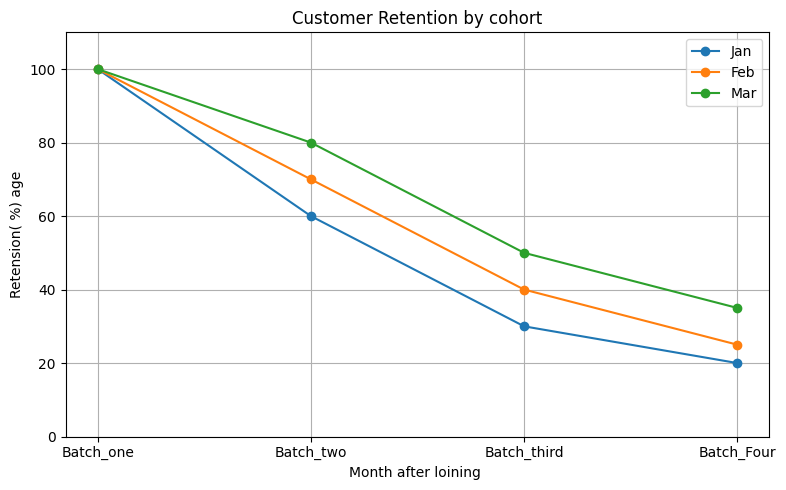

In [163]:
# Example
coherts = ['Jan' , 'Feb' , 'Mar']
months = ['Batch_one' , 'Batch_two' , 'Batch_third' , 'Batch_Four']
retention_data = [[100,60,30,20],[100,70,40,25],[100,80,50,35]]
plt.figure(figsize=(8,5))
for i , cohert in enumerate(coherts):
    plt.plot(months , retention_data[i] ,marker='o' , label=cohert)

plt.title('Customer Retention by cohort')
plt.xlabel("Month after loining ")
plt.ylabel("Retension( %) age")
plt.ylim(0,110)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Now we work on original dataset

In [164]:
df = pd.read_csv(r'D:\Learnbay\Weekend Project Sunduram sir\E-COMMERS\E-com_Data.csv')
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [165]:
df.duplicated().sum()

3145

In [166]:
df.drop_duplicates(inplace=True)

In [167]:
df.duplicated().sum()

0

In [168]:
df.isnull().sum()

CustomerID           133790
Item Code                 1
InvoieNo                  1
Date of purchase          1
Quantity                  1
Time                      1
price per Unit            1
Price                     1
Shipping Location         1
Cancelled_status     529626
Reason of return     537968
Sold as set          537971
dtype: int64

In [169]:
df.dropna(subset=['CustomerID'] , inplace=True)

In [170]:
df.isnull().sum()

CustomerID                0
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     395998
Reason of return     404181
Sold as set          404181
dtype: int64

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404181 entries, 0 to 537949
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404181 non-null  float64
 1   Item Code          404181 non-null  object 
 2   InvoieNo           404181 non-null  float64
 3   Date of purchase   404181 non-null  object 
 4   Quantity           404181 non-null  float64
 5   Time               404181 non-null  object 
 6   price per Unit     404181 non-null  float64
 7   Price              404181 non-null  float64
 8   Shipping Location  404181 non-null  object 
 9   Cancelled_status   8183 non-null    object 
 10  Reason of return   0 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 40.1+ MB


In [172]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [179]:
df['Date'] = pd.to_datetime(df['Date of purchase'])
df['Month'] = df['Date'].dt.to_period('M')
df['Cohort_month'] = df.groupby('CustomerID')['Date'].transform('min').dt.to_period('M')

In [180]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Date,Month,Cohort_month
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN,2017-10-29,2017-10,2017-09
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN,2017-10-05,2017-10,2017-02
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN,2017-10-12,2017-10,2017-02
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN,2017-08-22,2017-08,2017-02
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN,2017-10-10,2017-10,2017-02


In [181]:
def cohert_index(df):
    year_diff = df['Month'].dt.year - df['Cohort_month'].dt.year
    month_diff = df['Month'].dt.month - df['Cohort_month'].dt.month

    return year_diff * 12 + month_diff + 1

In [182]:
df['Cohort_index'] = cohert_index(df)

In [183]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Date,Month,Cohort_month,Cohort_index
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN,2017-10-29,2017-10,2017-09,2
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN,2017-10-05,2017-10,2017-02,9
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN,2017-10-12,2017-10,2017-02,9
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN,2017-08-22,2017-08,2017-02,7
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN,2017-10-10,2017-10,2017-02,9


In [187]:
cohert_data = df.groupby([ 'Cohort_month', 'Cohort_index'])['CustomerID'].nunique().reset_index()
cohert_counts = cohert_data.pivot_table(index='Cohort_month' , columns='Cohort_index' , values='CustomerID')

In [188]:
cohert_counts

Cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_month,,,,,,,,,,,,,
2016-12,939.0,349.0,378.0,385.0,418.0,391.0,391.0,378.0,366.0,413.0,409.0,505.0,386.0
2017-01,392.0,206.0,125.0,125.0,132.0,135.0,123.0,113.0,134.0,159.0,163.0,103.0,NaN
2017-02,368.0,168.0,98.0,108.0,110.0,111.0,119.0,117.0,127.0,125.0,69.0,NaN,NaN
2017-03,447.0,179.0,121.0,115.0,117.0,96.0,129.0,139.0,141.0,81.0,NaN,NaN,NaN
2017-04,321.0,117.0,86.0,79.0,75.0,88.0,95.0,96.0,55.0,NaN,NaN,NaN,NaN
2017-05,269.0,108.0,61.0,55.0,64.0,87.0,80.0,57.0,NaN,NaN,NaN,NaN,NaN
2017-06,238.0,93.0,53.0,66.0,74.0,85.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-07,189.0,82.0,44.0,50.0,57.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,167.0,74.0,45.0,49.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Retention

In [193]:
cohert_size = cohert_counts.iloc[:,0]
retension = cohert_counts.divide(cohert_size , axis=0)

### Visulization

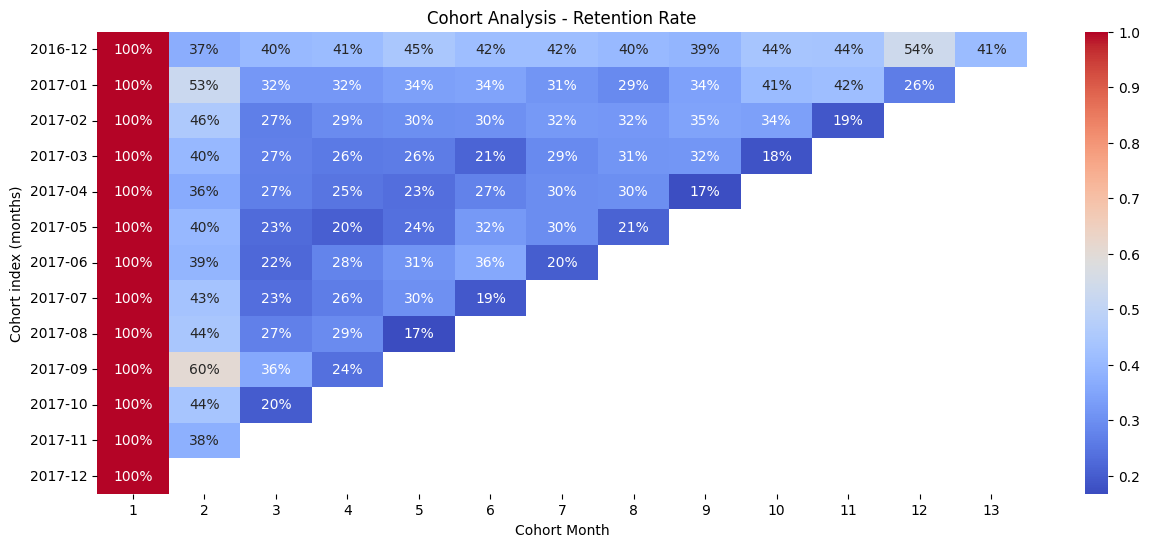

In [196]:
plt.figure(figsize=(15,6))
sns.heatmap(retension , annot=True , fmt='.0%' , cmap='coolwarm')
plt.title('Cohort Analysis - Retention Rate')
plt.xlabel('Cohort Month')
plt.ylabel('Cohort index (months)')
plt.show()